## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

## Import Data

In [2]:
df = pd.read_csv(r"C:\Users\PRITAM\Downloads\DMart.csv", encoding='utf-8')


## Data Structure and Distribution

In [3]:
df.shape

(5189, 9)

### Dataset is having 5189 observations with 9 column.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5189 entries, 0 to 5188
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             5188 non-null   object 
 1   Brand            4789 non-null   object 
 2   Price            5188 non-null   float64
 3   DiscountedPrice  5188 non-null   float64
 4   Category         5186 non-null   object 
 5   SubCategory      5186 non-null   object 
 6   Quantity         5188 non-null   object 
 7   Description      5187 non-null   object 
 8   BreadCrumbs      5186 non-null   object 
dtypes: float64(2), object(7)
memory usage: 365.0+ KB


In [10]:
df.head()

Name   Brand   Price  DiscountedPrice  \
0             Premia Badam (Almonds)  Premia   451.0            329.0   
1             Premia Badam (Almonds)  Premia   109.0             85.0   
2             Premia Badam (Almonds)  Premia   202.0            175.0   
3  Nutraj California Almonds (Badam)  Nutraj   599.0            349.0   
4  Nutraj California Almonds (Badam)  Nutraj  1549.0            659.0   

  Category         SubCategory Quantity Description  \
0  Grocery  Grocery/Dry Fruits   500 gm       India   
1  Grocery  Grocery/Dry Fruits   100 gm       India   
2  Grocery  Grocery/Dry Fruits   200 gm       India   
3  Grocery          Dry Fruits   500 gm         USA   
4  Grocery          Dry Fruits     1 kg         USA   

                    BreadCrumbs  
0  Grocery > Grocery/Dry Fruits  
1  Grocery > Grocery/Dry Fruits  
2  Grocery > Grocery/Dry Fruits  
3          Grocery > Dry Fruits  
4          Grocery > Dry Fruits

#### 
Conclusion : Here we can observe that the Datatype of Quantity column which is given as Str will not help us in our analysis so we need to change it.

But fot making any change we have to look upon the unique values which are present in Quantity Column

In [11]:
df['Quantity'].unique()

array(['500 gm', '100 gm', '200 gm', '1 kg', '400 gm', '5 kg', '250 gm',
       '1 Kg', '150 gm', '450 gm', '50 gm', '1 L', '900 gm', '20 gm',
       '10 gm', '4 pcs', '5 L', '15 L', '5  L', '500 ml', '2 L', '200 ml',
       '250 ml', '2x1L', '225 ml', '10 kg', '5 Kg', ' 5 kg', '25 gm',
       '350 gm', '72 gm', ' 50 gm', '35 gm', '60 gm', '120 gm', '80 gm',
       '5 U', '40 gm', '700 gm', '1 gm', '45 gm', '7 gm', '75 gm',
       '20 ml', '1.5 kg', '25 Bags', '100 Bags', '10 Bags', '50 Bags',
       '140 gm', '168 gm', '16 Bags', '180 ml', '1 L x 12 U', '476 gm',
       '750 gm', '663 gm', '600 gm', '180 gm', '160 gm', '20 Bag',
       '2x500 gm', '95 gm', '48 gm', '5x65 ml', '380 gm', '10 U',
       '150 ml', '85 gm', '90 gm', '225 gm', '2.25 L', '600 ml', '1.75 L',
       '8x250 ml', '750 ml', '300 ml', '6x330 ml', '330 ml', '750  ml',
       '1.2 L', '6x250 ml', '4x250 ml', '350 ml', '623 gm', '253 gm',
       '143 gm', '584 gm', '4X100 gm', '300 gm', '138 gm', '276 gm',
       '12

####
Looking at above values we can conclude that converting this column will become a hectinc task so we won't consider this column in our analysis

In [12]:
df.duplicated().sum()

0

####
No Duplicate Value found

In [13]:
df.isnull().sum()

Name                 1
Brand              400
Price                1
DiscountedPrice      1
Category             3
SubCategory          3
Quantity             1
Description          2
BreadCrumbs          3
dtype: int64

####
Our data is having multiple Null Values.

In [15]:

df = pd.DataFrame(df)

# Fill null values
df["Name"].fillna("Unknown", inplace=True)                # Fill with 'Unknown'
df["Brand"].fillna("Unknown", inplace=True)               # Fill with 'Unknown'
df["Price"].fillna(0, inplace=True)                       # Fill numeric with 0
df["DiscountedPrice"].fillna(0, inplace=True)             # Fill numeric with 0
df["Category"].fillna("Not Specified", inplace=True)      # Fill with placeholder
df["SubCategory"].fillna("Not Specified", inplace=True)   # Fill with placeholder
df["Quantity"].fillna(1, inplace=True)                   # Fill numeric with default
df["Description"].fillna("No Description", inplace=True)  # Fill with placeholder
df["BreadCrumbs"].fillna("No Breadcrumbs", inplace=True)  # Fill with placeholder

# Display the cleaned DataFrame
print(df)

                                           Name    Brand   Price  \
0                        Premia Badam (Almonds)   Premia   451.0   
1                        Premia Badam (Almonds)   Premia   109.0   
2                        Premia Badam (Almonds)   Premia   202.0   
3             Nutraj California Almonds (Badam)   Nutraj   599.0   
4             Nutraj California Almonds (Badam)   Nutraj  1549.0   
...                                         ...      ...     ...   
5184       Navneet Youva A4 Notebook - Assorted  Navneet    55.0   
5185  Navneet Youva Longbook Journal - Assorted  Navneet    85.0   
5186     Navneet Youva Long Notebook - Assorted  Navneet    55.0   
5187      Navneet Youva Drawing Book - Assorted  Navneet   110.0   
5188  Navneet Youva Canvas Board (10x12 Inches)  Navneet    90.0   

      DiscountedPrice         Category         SubCategory Quantity  \
0               329.0          Grocery  Grocery/Dry Fruits   500 gm   
1                85.0          Grocery  G

In [16]:
df.isnull().sum()

Name               0
Brand              0
Price              0
DiscountedPrice    0
Category           0
SubCategory        0
Quantity           0
Description        0
BreadCrumbs        0
dtype: int64

#### 
We have filled all Null Values 

In [23]:
df.head()

Name   Brand   Price  DiscountedPrice  \
0             Premia Badam (Almonds)  Premia   451.0            329.0   
1             Premia Badam (Almonds)  Premia   109.0             85.0   
2             Premia Badam (Almonds)  Premia   202.0            175.0   
3  Nutraj California Almonds (Badam)  Nutraj   599.0            349.0   
4  Nutraj California Almonds (Badam)  Nutraj  1549.0            659.0   

  Category         SubCategory Quantity Description  \
0  Grocery  Grocery/Dry Fruits   500 gm       India   
1  Grocery  Grocery/Dry Fruits   100 gm       India   
2  Grocery  Grocery/Dry Fruits   200 gm       India   
3  Grocery          Dry Fruits   500 gm         USA   
4  Grocery          Dry Fruits     1 kg         USA   

                    BreadCrumbs  DiscountPercent  
0  Grocery > Grocery/Dry Fruits               27  
1  Grocery > Grocery/Dry Fruits               22  
2  Grocery > Grocery/Dry Fruits               13  
3          Grocery > Dry Fruits               41  
4          Grocery > Dry Fruits               57

In [17]:
df['DiscountPercent'] = (df['Price']-df['DiscountedPrice'])*100/df['Price']

In [18]:
df.isnull().sum()

Name               0
Brand              0
Price              0
DiscountedPrice    0
Category           0
SubCategory        0
Quantity           0
Description        0
BreadCrumbs        0
DiscountPercent    2
dtype: int64

In [19]:
df[df['DiscountPercent'].isnull()==True]

Name    Brand  Price  \
2230           Kopiko Cappuccino Coffee Candies   Kopiko    0.0   
4323  Elle 18 Nail Pops Nail Colour - Shade 125  Elle 18    0.0   

      DiscountedPrice       Category              SubCategory Quantity  \
2230              0.0  Packaged Food                   Sweets   140 gm   
4323              0.0  Personal Care  Personal Care/Nail Care     5 ml   

                                            Description  \
2230  OverviewKopiko candy is made from real coffee ...   
4323                                     No Description   

                                  BreadCrumbs  DiscountPercent  
2230                   Packaged Food > Sweets              NaN  
4323  Personal Care > Personal Care/Nail Care              NaN

In [20]:
df['DiscountPercent'] = df['DiscountPercent'].fillna(0)

In [21]:
df['DiscountPercent']=df['DiscountPercent'].apply(lambda x:int(x))

In [22]:
df.isnull().sum()

Name               0
Brand              0
Price              0
DiscountedPrice    0
Category           0
SubCategory        0
Quantity           0
Description        0
BreadCrumbs        0
DiscountPercent    0
dtype: int64

In [24]:
df.head()

Name   Brand   Price  DiscountedPrice  \
0             Premia Badam (Almonds)  Premia   451.0            329.0   
1             Premia Badam (Almonds)  Premia   109.0             85.0   
2             Premia Badam (Almonds)  Premia   202.0            175.0   
3  Nutraj California Almonds (Badam)  Nutraj   599.0            349.0   
4  Nutraj California Almonds (Badam)  Nutraj  1549.0            659.0   

  Category         SubCategory Quantity Description  \
0  Grocery  Grocery/Dry Fruits   500 gm       India   
1  Grocery  Grocery/Dry Fruits   100 gm       India   
2  Grocery  Grocery/Dry Fruits   200 gm       India   
3  Grocery          Dry Fruits   500 gm         USA   
4  Grocery          Dry Fruits     1 kg         USA   

                    BreadCrumbs  DiscountPercent  
0  Grocery > Grocery/Dry Fruits               27  
1  Grocery > Grocery/Dry Fruits               22  
2  Grocery > Grocery/Dry Fruits               13  
3          Grocery > Dry Fruits               41  
4          Grocery > Dry Fruits               57

In [25]:
df['SubCategory'].unique()

array(['Grocery/Dry Fruits', 'Dry Fruits', 'Dals', 'Pulses',
       'Masala & Spices', 'Grocery/Salt / Sugar / Jaggery',
       'Ghee & Vanaspati', 'Grocery/Rice & Rice Products',
       'Grocery/Masala & Spices', 'Grocery/Flours & Grains',
       'Cooking Oil', 'Hair Care', 'Gourmet Food', 'Flours & Grains',
       'Rice & Rice Products', 'DMart Grocery/Rice & Rice Products',
       'Pickles', 'Salt / Sugar / Jaggery', 'Snacks & Farsans',
       'Beverages', 'DMart Grocery', 'Dairy', 'Biscuits & Cookies',
       'Bakery', 'Personal Care', 'Ready To Cook', 'Breakfast Cereals',
       'Packaged Food', 'Sweets', 'Ketchup & Sauce', 'Jams & Spreads',
       'Pasta & Noodles', 'Fruits & Vegetables',
       'Detergent & Fabric Care', 'Cleaners', 'Specials',
       'Home & Kitchen', 'Cleaning Tools', 'Freshener & Repellents',
       'Bed & Bath', 'Furniture & Décor', 'Disinfectants',
       'Tissue Paper & Napkins', 'Home & Kitchen/Tissue Paper & Napkins',
       'Kitchen Aprons', 'Home Appli

In [26]:
df['SubCategory'] = df['SubCategory'].apply(lambda x: x.split('/')[-1])

In [27]:
df['SubCategory'].unique()

array(['Dry Fruits', 'Dals', 'Pulses', 'Masala & Spices', ' Jaggery',
       'Ghee & Vanaspati', 'Rice & Rice Products', 'Flours & Grains',
       'Cooking Oil', 'Hair Care', 'Gourmet Food', 'Pickles',
       'Snacks & Farsans', 'Beverages', 'DMart Grocery', 'Dairy',
       'Biscuits & Cookies', 'Bakery', 'Personal Care', 'Ready To Cook',
       'Breakfast Cereals', 'Packaged Food', 'Sweets', 'Ketchup & Sauce',
       'Jams & Spreads', 'Pasta & Noodles', 'Fruits & Vegetables',
       'Detergent & Fabric Care', 'Cleaners', 'Specials',
       'Home & Kitchen', 'Cleaning Tools', 'Freshener & Repellents',
       'Bed & Bath', 'Furniture & Décor', 'Disinfectants',
       'Tissue Paper & Napkins', 'Kitchen Aprons', 'Home Appliances',
       'Wonderchef', 'Water Purifiers & Accessories', 'Home Utility',
       'Tableware', 'Butterfly', 'Cookware & Serveware', 'Not Specified',
       'Festive Specials', 'Joyo Plastics', 'Pooja Needs', 'Geep',
       'Zebronics', 'Skin Care', 'Face Care', 'Eye 

In [28]:
df.head()

Name   Brand   Price  DiscountedPrice  \
0             Premia Badam (Almonds)  Premia   451.0            329.0   
1             Premia Badam (Almonds)  Premia   109.0             85.0   
2             Premia Badam (Almonds)  Premia   202.0            175.0   
3  Nutraj California Almonds (Badam)  Nutraj   599.0            349.0   
4  Nutraj California Almonds (Badam)  Nutraj  1549.0            659.0   

  Category SubCategory Quantity Description                   BreadCrumbs  \
0  Grocery  Dry Fruits   500 gm       India  Grocery > Grocery/Dry Fruits   
1  Grocery  Dry Fruits   100 gm       India  Grocery > Grocery/Dry Fruits   
2  Grocery  Dry Fruits   200 gm       India  Grocery > Grocery/Dry Fruits   
3  Grocery  Dry Fruits   500 gm         USA          Grocery > Dry Fruits   
4  Grocery  Dry Fruits     1 kg         USA          Grocery > Dry Fruits   

   DiscountPercent  
0               27  
1               22  
2               13  
3               41  
4               57

In [29]:
df.BreadCrumbs.unique()

array(['Grocery > Grocery/Dry Fruits', 'Grocery > Dry Fruits',
       'Grocery > Dals', 'Grocery > Pulses', 'Grocery > Masala & Spices',
       'Grocery > Grocery/Salt / Sugar / Jaggery',
       'Grocery > Ghee & Vanaspati',
       'Grocery > Grocery/Rice & Rice Products',
       'Grocery > Grocery/Masala & Spices',
       'Grocery > Grocery/Flours & Grains', 'Grocery > Cooking Oil',
       'Personal Care > Hair Care', 'Packaged Food > Gourmet Food',
       'Grocery > Flours & Grains', 'Grocery > Rice & Rice Products',
       'DMart Grocery > DMart Grocery/Rice & Rice Products',
       'Packaged Food > Pickles', 'Grocery > Salt / Sugar / Jaggery',
       'Packaged Food > Snacks & Farsans',
       'Dairy & Beverages > Beverages', 'DMart Grocery',
       'DMart Grocery > Rice & Rice Products',
       'Dairy & Beverages > Dairy', 'Packaged Food > Biscuits & Cookies',
       'Packaged Food > Biscuits & Cookies > Bakery',
       'Packaged Food > Health & Wellness > Personal Care',
       'P

In [30]:
df.head()

Name   Brand   Price  DiscountedPrice  \
0             Premia Badam (Almonds)  Premia   451.0            329.0   
1             Premia Badam (Almonds)  Premia   109.0             85.0   
2             Premia Badam (Almonds)  Premia   202.0            175.0   
3  Nutraj California Almonds (Badam)  Nutraj   599.0            349.0   
4  Nutraj California Almonds (Badam)  Nutraj  1549.0            659.0   

  Category SubCategory Quantity Description                   BreadCrumbs  \
0  Grocery  Dry Fruits   500 gm       India  Grocery > Grocery/Dry Fruits   
1  Grocery  Dry Fruits   100 gm       India  Grocery > Grocery/Dry Fruits   
2  Grocery  Dry Fruits   200 gm       India  Grocery > Grocery/Dry Fruits   
3  Grocery  Dry Fruits   500 gm         USA          Grocery > Dry Fruits   
4  Grocery  Dry Fruits     1 kg         USA          Grocery > Dry Fruits   

   DiscountPercent  
0               27  
1               22  
2               13  
3               41  
4               57

In [31]:
df['BreadCrumbs'] = df.BreadCrumbs.apply(lambda x:x.split('>')[-1]).apply(lambda x:x.split('/')[-1])

In [32]:
df.head()

Name   Brand   Price  DiscountedPrice  \
0             Premia Badam (Almonds)  Premia   451.0            329.0   
1             Premia Badam (Almonds)  Premia   109.0             85.0   
2             Premia Badam (Almonds)  Premia   202.0            175.0   
3  Nutraj California Almonds (Badam)  Nutraj   599.0            349.0   
4  Nutraj California Almonds (Badam)  Nutraj  1549.0            659.0   

  Category SubCategory Quantity Description  BreadCrumbs  DiscountPercent  
0  Grocery  Dry Fruits   500 gm       India   Dry Fruits               27  
1  Grocery  Dry Fruits   100 gm       India   Dry Fruits               22  
2  Grocery  Dry Fruits   200 gm       India   Dry Fruits               13  
3  Grocery  Dry Fruits   500 gm         USA   Dry Fruits               41  
4  Grocery  Dry Fruits     1 kg         USA   Dry Fruits               57

In [33]:
df[['SubCategory','BreadCrumbs']].tail(100)

SubCategory        BreadCrumbs
5089      School Needs       School Needs
5090           Jaggery            Jaggery
5091           Jaggery            Jaggery
5092  Personal Hygiene   Personal Hygiene
5093      School Needs       School Needs
...                ...                ...
5184      School Needs       School Needs
5185      School Needs       School Needs
5186      School Needs       School Needs
5187      School Needs       School Needs
5188      School Needs       School Needs

[100 rows x 2 columns]

#### 
SubCategory and BreadCrumbs are one and the same column.

In [34]:
df.drop(['BreadCrumbs'],axis=1,inplace=True)

In [35]:
df.head()

Name   Brand   Price  DiscountedPrice  \
0             Premia Badam (Almonds)  Premia   451.0            329.0   
1             Premia Badam (Almonds)  Premia   109.0             85.0   
2             Premia Badam (Almonds)  Premia   202.0            175.0   
3  Nutraj California Almonds (Badam)  Nutraj   599.0            349.0   
4  Nutraj California Almonds (Badam)  Nutraj  1549.0            659.0   

  Category SubCategory Quantity Description  DiscountPercent  
0  Grocery  Dry Fruits   500 gm       India               27  
1  Grocery  Dry Fruits   100 gm       India               22  
2  Grocery  Dry Fruits   200 gm       India               13  
3  Grocery  Dry Fruits   500 gm         USA               41  
4  Grocery  Dry Fruits     1 kg         USA               57

In [36]:
df.describe()

Price  DiscountedPrice  DiscountPercent
count   5189.000000      5189.000000      5189.000000
mean     343.964061       236.624109        26.016959
std      600.995140       387.175338        15.208031
min        0.000000         0.000000         0.000000
25%       85.000000        64.000000        14.000000
50%      175.000000       125.000000        22.000000
75%      345.000000       249.000000        35.000000
max    10990.000000      7999.000000        98.000000

####
Observation:

Price :

(Mean = Rs.344, Minimum = 0 (Free Product), Maximum = Rs.10,990)

DiscountedPrice :

(Mean = Rs.237, Minimum = 0 (Free Product), Maximum = Rs.7,999)

DiscountPercent :

(Mean = 26 %, Minimum = 0 (Free Product), Maximum = 98%)

Looking at maximum value of Dicount it seems impossible to have 98% Discount on any product so we have to inspect this.

In [38]:
df[df['DiscountPercent']==98]

Name   Brand  Price  DiscountedPrice  \
2191     Naagin Indian Hot Sauce - Original  Naagin   50.0              1.0   
2192  Naagin Indian Hot Sauce - Smoky Bhoot  Naagin   50.0              1.0   
2193  Naagin Indian Hot Sauce - Kantha Bomb  Naagin   50.0              1.0   

           Category   SubCategory Quantity  \
2191  Packaged Food  Gourmet Food    40 gm   
2192  Packaged Food  Gourmet Food    40 gm   
2193  Packaged Food  Gourmet Food    40 gm   

                                            Description  DiscountPercent  
2191  While we work to ensure that the product infor...               98  
2192  While we work to ensure that the product infor...               98  
2193  While we work to ensure that the product infor...               98

####
Conclusion after Inspection:

No, in actual Dmart sells NAGIN INDIAN HOT SAUCE for Rs.1 which saves Rs.49 from customers wallet (source : www.dmart.in)

DMART is known for the Discount it offers to it's customers so we need not to worry about the abnormal Discount Values

Distribution of Price


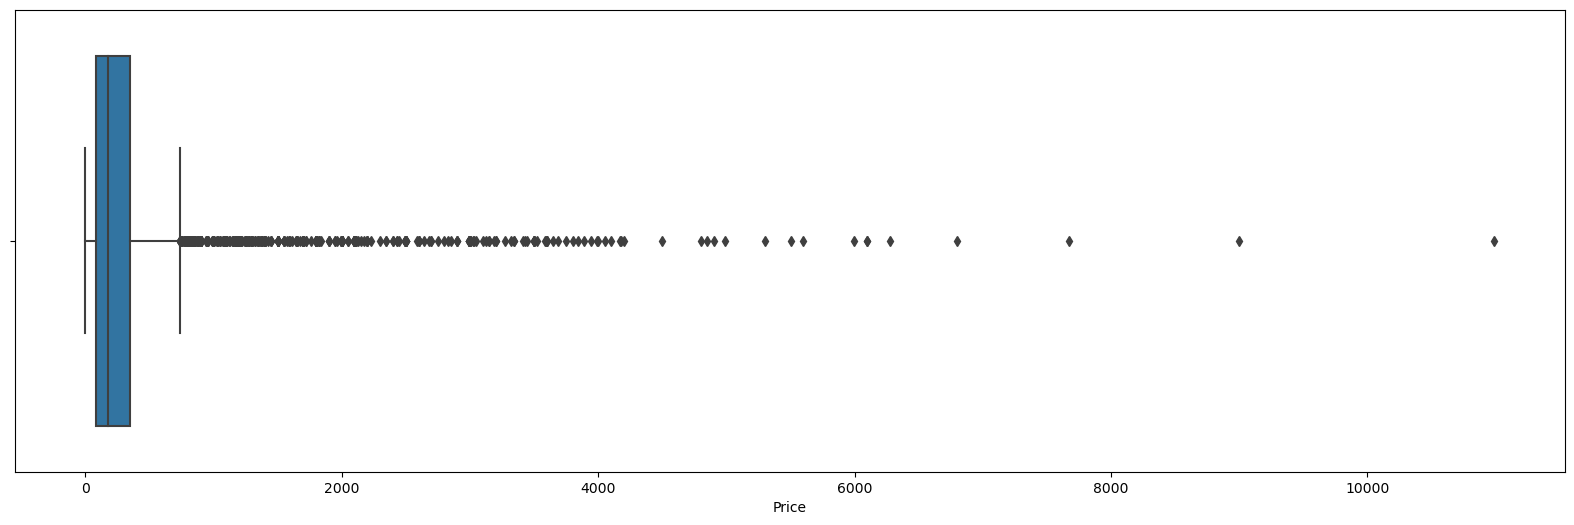

Distribution of DiscountedPrice


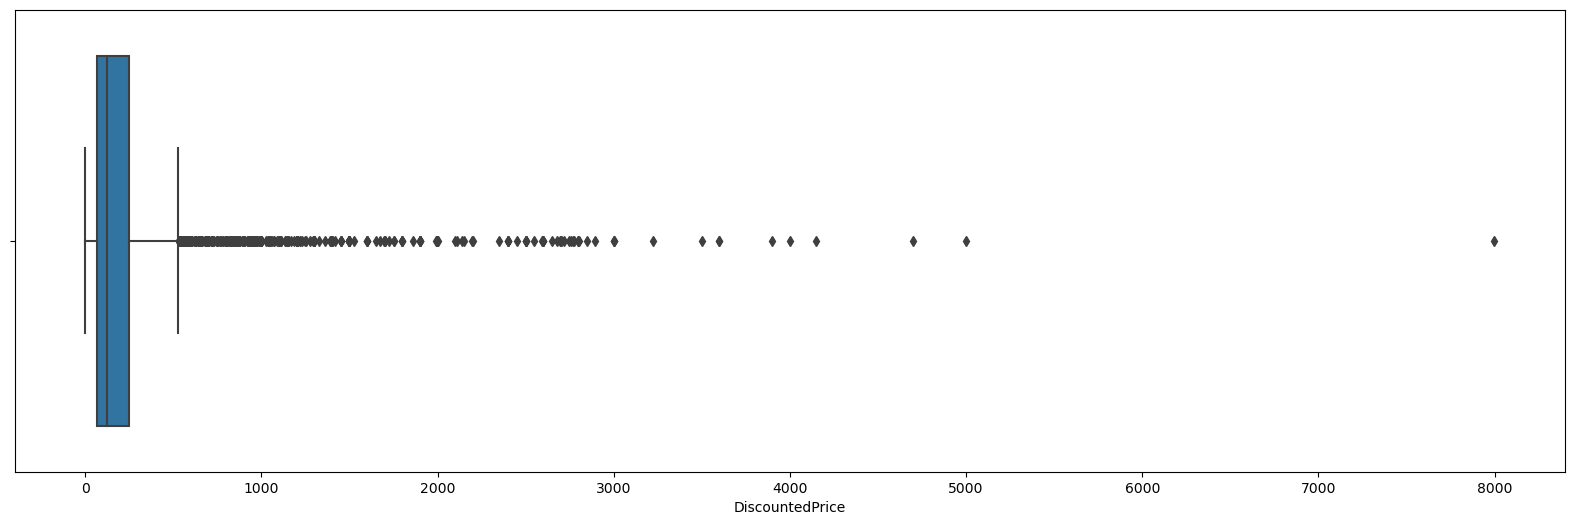

Distribution of DiscountPercent


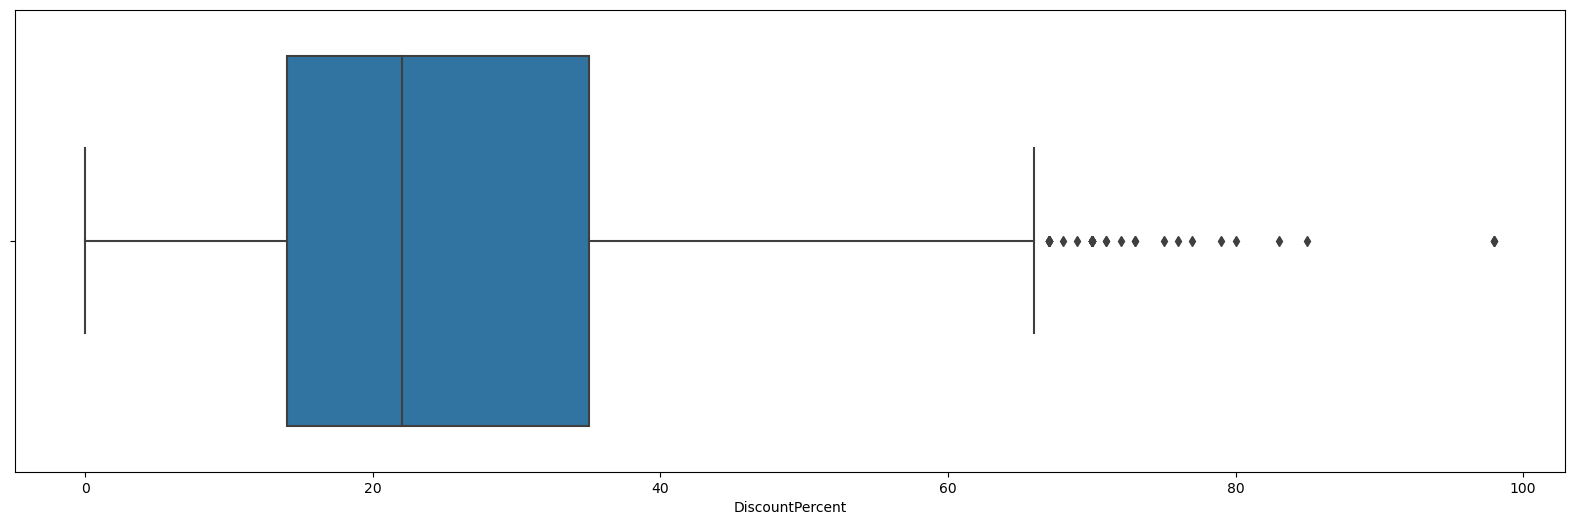

In [39]:
cols = ['Price','DiscountedPrice','DiscountPercent']

for i in cols:
    print('Distribution of',i)
    plt.figure(figsize=(20,6))
    sns.boxplot(x = df[i])
    plt.show()

####
Observation:

Yes there are few outliers present in our Data.

But as we are not doing this analysis in context of some machine learning problem we are free to keep those outliers.

Distribution of Price


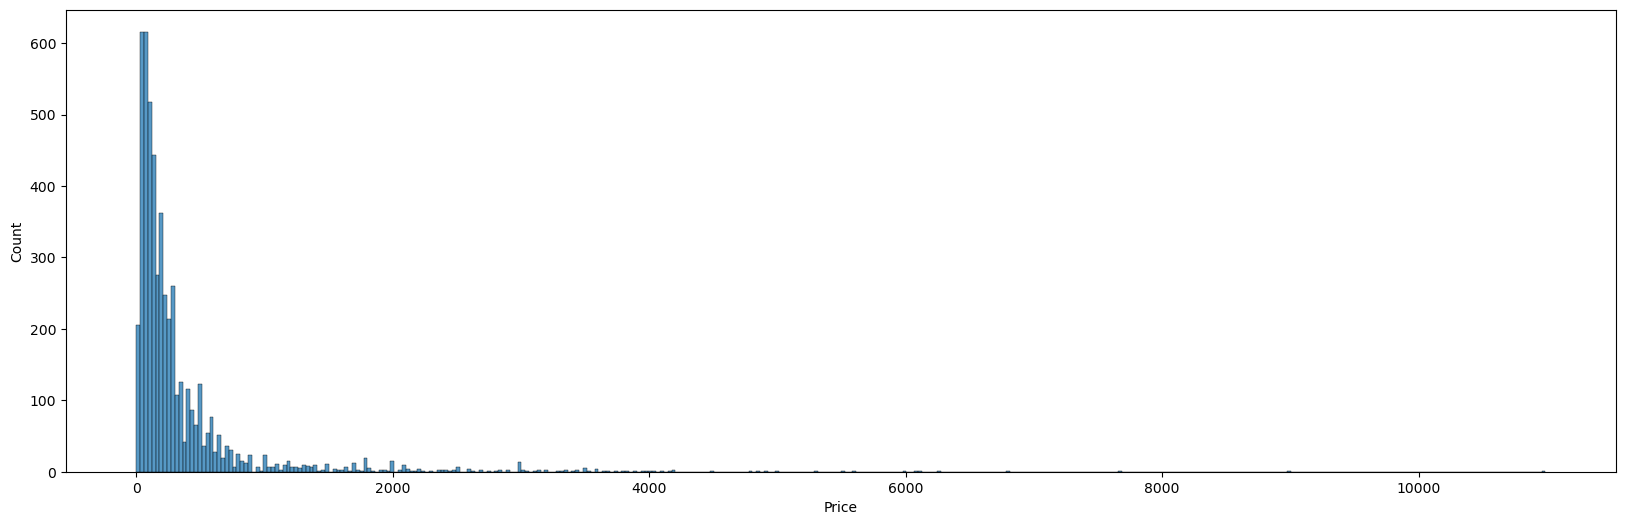

Distribution of DiscountedPrice


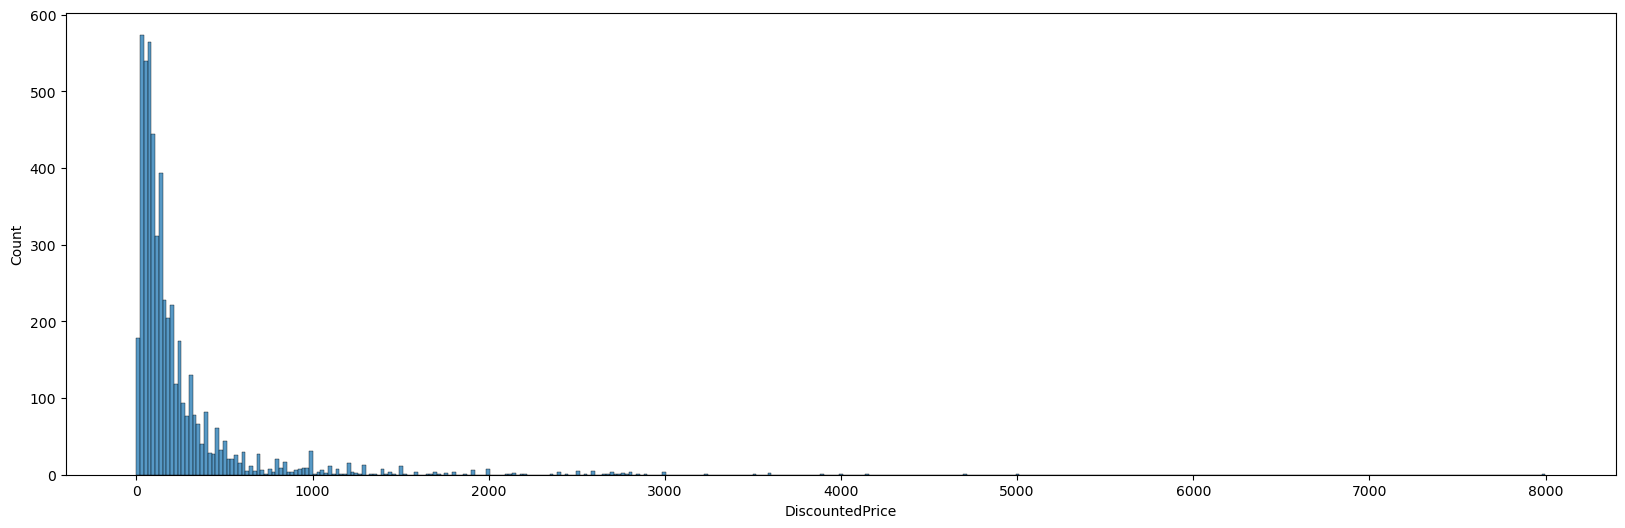

Distribution of DiscountPercent


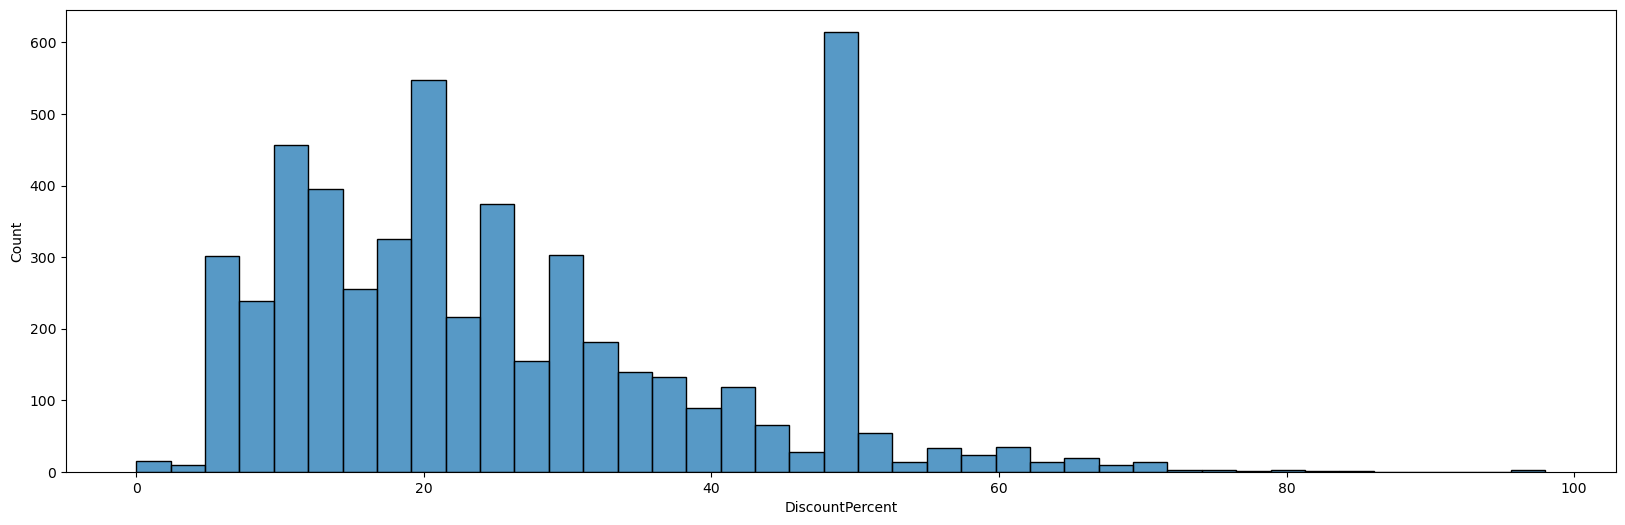

In [40]:
for i in cols:
    print('Distribution of',i)
    plt.figure(figsize=(20,6))
    sns.histplot(x = df[i])
    plt.show()

####
Observation:

All three Price,DicountedPrice and DiscountPercent values are mainly right skewed.

In [41]:
df.head(2)

Name   Brand  Price  DiscountedPrice Category  \
0  Premia Badam (Almonds)  Premia  451.0            329.0  Grocery   
1  Premia Badam (Almonds)  Premia  109.0             85.0  Grocery   

  SubCategory Quantity Description  DiscountPercent  
0  Dry Fruits   500 gm       India               27  
1  Dry Fruits   100 gm       India               22

## Description Wordcloud

In [42]:
from wordcloud import WordCloud, STOPWORDS

In [43]:
text = "".join(d for d in df['Description'])

In [44]:
wc = WordCloud(width= 1600,height=800,colormap='prism',background_color = 'white').generate(text)

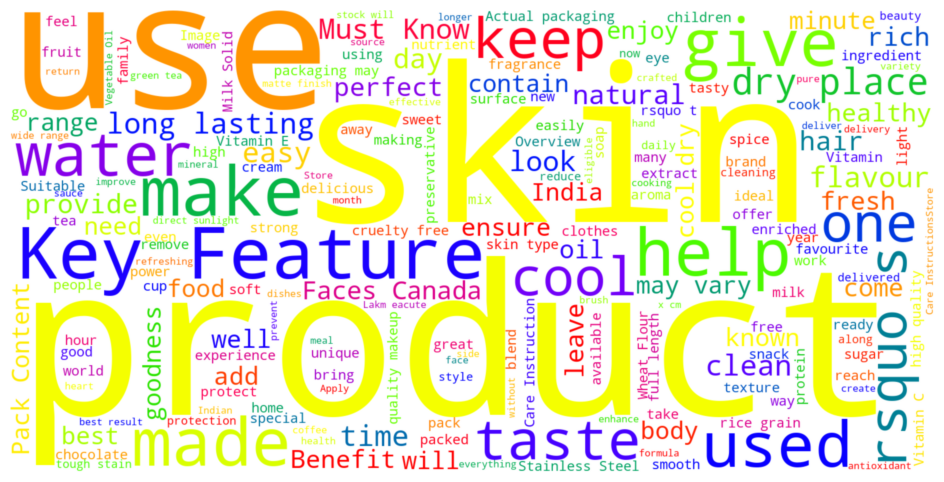

In [47]:
plt.figure(figsize = (25, 6))
plt.imshow(wc, interpolation="gaussian")
plt.axis("off")
plt.show()

### Analysis on the basis of Category and Sub Category

In [46]:
df.Category.unique()

array(['Grocery', 'Personal Care', 'Packaged Food', 'DMart Grocery',
       'Dairy & Beverages', 'Fruits & Vegetables', 'Home & Kitchen',
       'Specials', 'Kitchen Aprons', 'Appliances', 'Wonderchef',
       'Water Purifiers & Accessories', 'Tableware', 'Butterfly',
       'Not Specified', 'Joyo Plastics', 'Geep', 'Zebronics',
       'Beauty & Cosmetics', 'Syska', 'Pigeon', 'Clothing & Accessories',
       'School Supplies', 'Backpacks', 'Computer Accessories',
       'Plant Container', 'Motorbike Helmets', 'Smartwatches', 'Raincoat',
       'Baby & Kids'], dtype=object)

In [48]:
df.Category.value_counts()

Category
Personal Care                    1234
Packaged Food                    1125
Home & Kitchen                    880
Grocery                           840
Dairy & Beverages                 429
Specials                          187
Clothing & Accessories             97
Fruits & Vegetables                78
School Supplies                    69
Appliances                         53
Beauty & Cosmetics                 46
Raincoat                           33
DMart Grocery                      31
Plant Container                    23
Tableware                          18
Backpacks                          13
Zebronics                           5
Motorbike Helmets                   4
Baby & Kids                         4
Geep                                3
Not Specified                       3
Kitchen Aprons                      3
Butterfly                           2
Computer Accessories                2
Joyo Plastics                       2
Syska                               1
Pig

####
Observation:

Personal Care and Packaged food are the two categories whose max number of products available at Dmart.
In above list Wonderchef, Syska,pigeon,Zebronic,Geep,Joyo Plastic and Butterfly are not the categories they are the brands so we have to inspect these columns of our dataset

#### doubtful Categories

In [49]:
df[(df['Category'] == 'Wonderchef') | (df['Category'] == 'Syska') | (df['Category'] == 'Butterfly') | (df['Category'] == 'Pigeon')| (df['Category'] == 'Zebronics') | (df['Category'] == 'Geep') | (df['Category'] == 'Joyo Plastics') ]

Name          Brand  \
2934                       Wonderchef Nutri-Blend Black     Wonderchef   
3156   Butterfly Stainless Steel Outer Lid Curve Cooker      Butterfly   
3157   Butterfly Stainless Steel Outer Lid Curve Cooker      Butterfly   
3297  Joyo Kitchen Storewell Container Printed - Ass...  Joyo Plastics   
3298  Joyo Kitchen Storewell Container Printed - Ass...  Joyo Plastics   
3460              Geep Extreme 3 PIN Multi Plug Adapter           Geep   
3462  Geep Micro USB High Speed Charging Cable (1 Me...           Geep   
3463                             Geep G-Square Flex Box           Geep   
3464             Zebronics TU240C Type C Charging Cable      Zebronics   
4754                               Syska SDI07 Dry Iron          Syska   
4792                 Pigeon Induction Cooktop Acer Plus         Pigeon   
4917                  Zebronics Tulip Earphones - Black      Zebronics   
4918  Zebronics Gravity Wireless Bluetooth Neckband ...      Zebronics   
4921                Zebronics Delight Bluetooth Speaker      Zebronics   
4928                 Zebronics Aura Bluetooth Headphone      Zebronics   

       Price  DiscountedPrice       Category    SubCategory    Quantity  \
2934  5300.0           2699.0     Wonderchef     Wonderchef       400 W   
3156  4851.0           1999.0      Butterfly      Butterfly  5.5 Litres   
3157  3646.0           1599.0      Butterfly      Butterfly    3 Litres   
3297  1265.0            449.0  Joyo Plastics  Joyo Plastics   Pack of 3   
3298   550.0            499.0  Joyo Plastics  Joyo Plastics   Pack of 4   
3460   205.0             99.0           Geep           Geep         1 U   
3462   299.0             49.0           Geep           Geep         1 U   
3463   360.0            179.0           Geep           Geep    4 Metres   
3464   349.0             99.0      Zebronics      Zebronics         1 U   
4754   799.0            449.0          Syska          Syska      1000 W   
4792  3595.0           1799.0         Pigeon         Pigeon      1800 W   
4917   459.0            149.0      Zebronics      Zebronics         1 U   
4918  1299.0            649.0      Zebronics      Zebronics         1 U   
4921   899.0            499.0      Zebronics      Zebronics         3 W   
4928   999.0            499.0      Zebronics      Zebronics         1 U   

                                            Description  DiscountPercent  
2934  \n- The 400W superfast motor blends & grinds i...               49  
3156  Key Features\n- Material: Stainless Steel\n- C...               58  
3157  \n- Induction Base : Yes\n\nKey Features:\n- M...               56  
3297  \n- Colour : Blue , Pink\n- Capacity : 6.3 Lit...               64  
3298  \n- Colour : Blue , Pink\n- Capacity : 6.3 Lit...                9  
3460  \n- Brand : Geep\n- Type : Three Pin Plug\n- C...               51  
3462  \n- Code : Geep USB 001\n- Dimensions : 200 X ...               83  
3463  \n- Brand : Geep\n- Model No : GPFB 4 MS\n- So...               50  
3464  \n- USB to type C cable\n- Supports upto 2.4A\...               71  
4754  Specifications : \n- Voltage : 230V - 50Hz\n- ...               43  
4792  \n- Brand : Pigeon\n- Model Name : Acer Plus\n...               49  
4917  \nZeb-Tulip is a wired earphone that comes wit...               67  
4918                                              China               50  
4921  \n- Type : Portable BT speaker\n- Compatible D...               44  
4928  \nSpecifications :\n- Drive size : 40 mm\n- BT...               50

####
Conclusion:

Yes,our doubt was correct these are the names of brands and not the categories so we have to correct these columns

Zebronic is a Mobile Appliances manifacturing Company so category for these columns will be Appliances and Subcategory will be appliances only.

Syska manifactures electrical equipments which we use in home so we will allot it to Home & Kitchen Subcategory will be Home Appliances.

Geep will be in Appliances Category,subcategory is also appliances.

Butterfly will be alloted to Home & Kitchen and subcategory will be Kitchen Appliances.

Pigeon will be alloted to Home & Kitchen and subcategory will be Kitchen Appliances.

Joyo Pastics will be alloted to Home & Kitchen and subcategory will be Kitchen Appliances.

Wonderchef will be alloted to Home & Kitchen and subcategory will be Kitchen Appliances.

In [50]:
df['Category'] = df['Category'].replace({'Zebronics':'Appliances','Geep':'Appliances','Syska':'Home & Kitchen','Butterfly':'Home & Kitchen','Wonderchef':'Home & Kitchen','Joyo Plastics':'Home & Kitchen','Pigeon':'Home & Kitchen'})

In [51]:
df.Category.value_counts()

Category
Personal Care                    1234
Packaged Food                    1125
Home & Kitchen                    887
Grocery                           840
Dairy & Beverages                 429
Specials                          187
Clothing & Accessories             97
Fruits & Vegetables                78
School Supplies                    69
Appliances                         61
Beauty & Cosmetics                 46
Raincoat                           33
DMart Grocery                      31
Plant Container                    23
Tableware                          18
Backpacks                          13
Motorbike Helmets                   4
Baby & Kids                         4
Not Specified                       3
Kitchen Aprons                      3
Computer Accessories                2
Water Purifiers & Accessories       1
Smartwatches                        1
Name: count, dtype: int64

Text(0, 0.5, 'Number of Products')

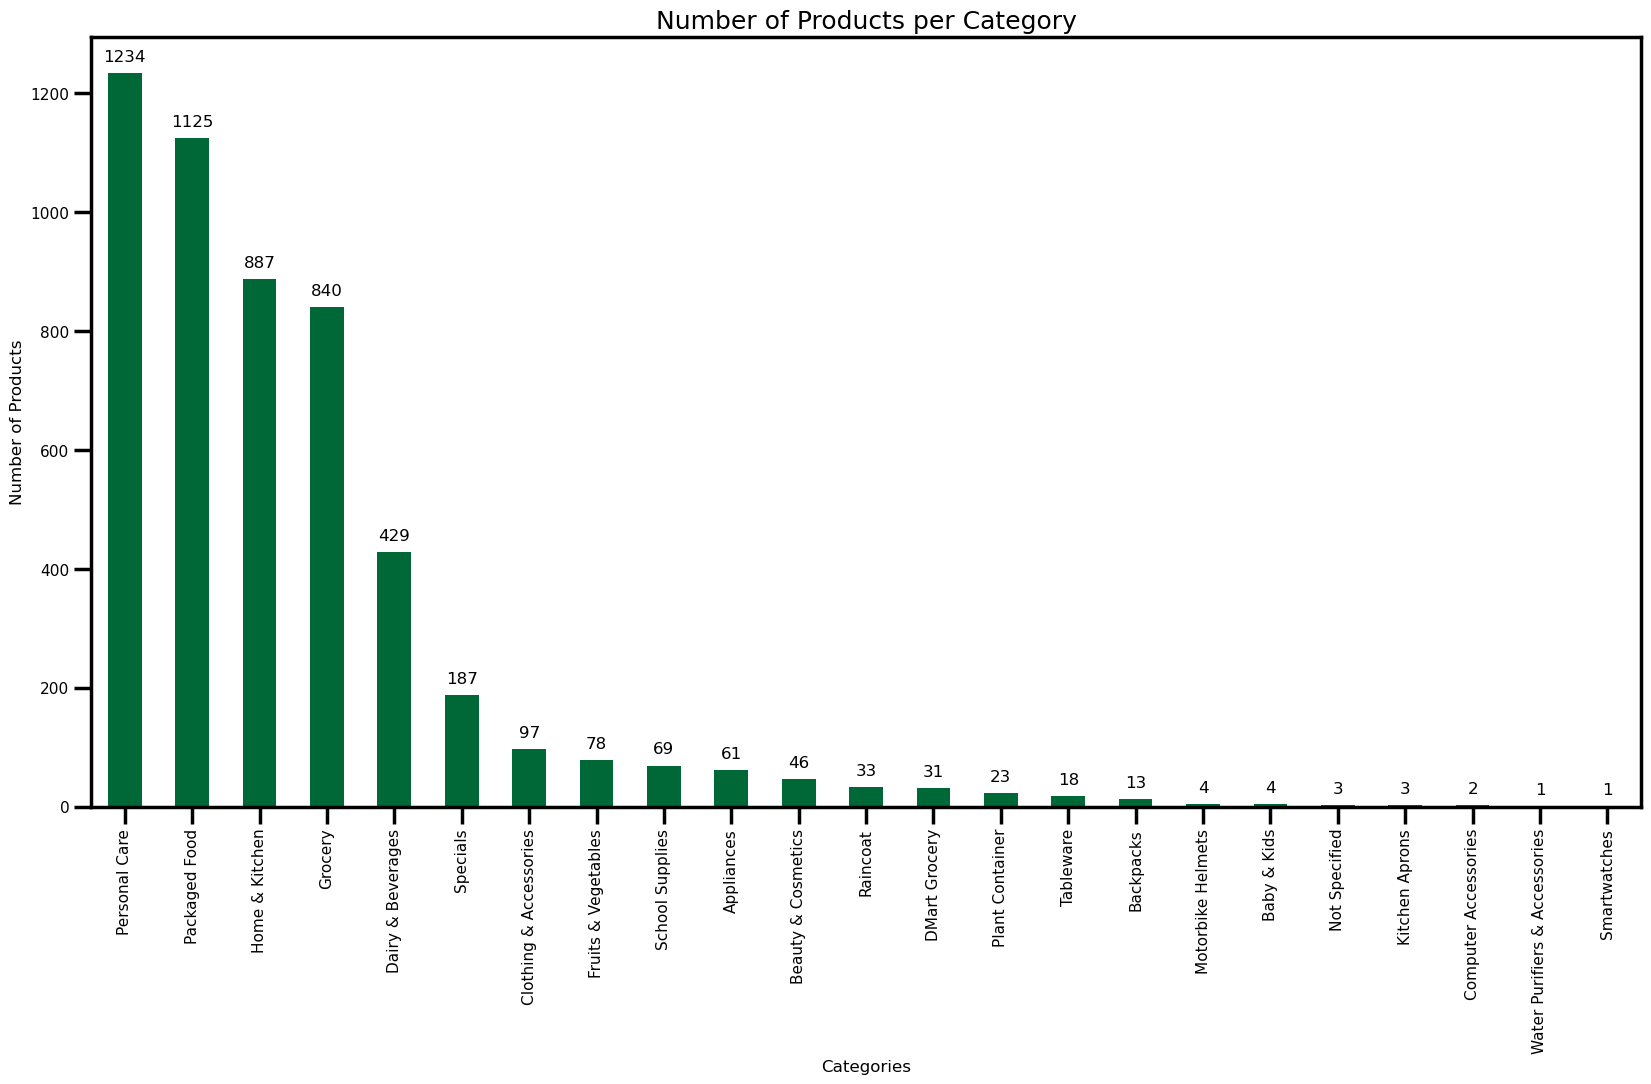

In [52]:
sns.set_context("poster",font_scale=0.5)
plt.figure(figsize=(20,10))
ax = df.Category.value_counts().plot(kind='bar',cmap='RdYlGn_r')

for p in ax.patches:
    ax.annotate(int(p.get_height()),(p.get_x()+0.25,p.get_height()+20),ha='center',color='black')
    
plt.title('Number of Products per Category',fontsize=18)
plt.xlabel('Categories')
plt.ylabel('Number of Products')

####  Correcting SubCategories

In [53]:
df['SubCategory']=df['SubCategory'].replace({'Zebronics':'Appliances','Geep':'Appliances','Syska':'Home Appliances','Butterfly':'Kitchen Appliances','Wonderchef':'Kitchen Appliances','Joyo Plastics':'Kitchen Appliances','Pigeon':'Kitchen Appliances'})

In [54]:
df.SubCategory.value_counts()

SubCategory
Snacks & Farsans                 302
Masala & Spices                  297
Beverages                        282
Skin Care                        257
Face Care                        174
                                ... 
Kitchen Aprons                     3
Not Specified                      3
Computer Accessories               2
Water Purifiers & Accessories      1
Smartwatches                       1
Name: count, Length: 68, dtype: int64

In [4]:
px.bar(x=df.SubCategory.value_counts().index, y=df.SubCategory.value_counts().values,color=df.SubCategory.value_counts().values,title='Number of Products in each Subcategory')


#### Number of SubCategories,Brands and Products per Categoriy

In [56]:
df.groupby("Category")[['SubCategory','Brand','Name']].nunique().rename(columns={"Name":'Number of Products'})

SubCategory  Brand  Number of Products
Category                                                             
Appliances                               3     20                  60
Baby & Kids                              1      2                   4
Backpacks                                1      5                  13
Beauty & Cosmetics                       2     11                  42
Clothing & Accessories                   2      9                  42
Computer Accessories                     1      1                   2
DMart Grocery                            2      3                  21
Dairy & Beverages                        2    106                 338
Fruits & Vegetables                      1      3                  76
Grocery                                  9    124                 663
Home & Kitchen                          14    187                 756
Kitchen Aprons                           1      1                   3
Motorbike Helmets                        1      2                   4
Not Specified                            1      3                   3
Packaged Food                           13    244                 979
Personal Care                           14    174                1070
Plant Container                          1      1                  23
Raincoat                                 1      1                  16
School Supplies                          1     20                  65
Smartwatches                             1      1                   1
Specials                                 2     42                 170
Tableware                                1      1                  10
Water Purifiers & Accessories            1      1                   1

#### Avg Discount on Each Category

In [57]:
df.DiscountPercent.mean()

26.016958951628446

In [58]:
df.groupby('Category')['DiscountPercent'].mean().sort_values(ascending=False)

Category
Smartwatches                     58.000000
Backpacks                        51.461538
Not Specified                    49.666667
Computer Accessories             37.500000
Appliances                       34.672131
Specials                         32.326203
Clothing & Accessories           32.123711
Plant Container                  30.521739
Beauty & Cosmetics               28.891304
Home & Kitchen                   28.748591
Packaged Food                    28.369778
Personal Care                    25.544571
DMart Grocery                    24.483871
Kitchen Aprons                   24.000000
Fruits & Vegetables              21.974359
Grocery                          21.438095
Dairy & Beverages                21.046620
Tableware                        20.500000
School Supplies                  20.289855
Motorbike Helmets                14.750000
Raincoat                         11.515152
Water Purifiers & Accessories     5.000000
Baby & Kids                       2.750000
Na

####
Observation:

As we can clearly DMART is offereing high percent of discounts on those categories in which we usually purchase.
Though Smartwatches,Backpacks and Computer Accessories are at top 3 positions in list but the number of product or the variety in them is quite less.
So the main categories which are attracting the cutomers by discounts offer in them are

####
  1. Colthes and Accessories 
  2. Beauty and Cosmetics
  3. Personal Care 
  4. Packaged Food 
  all above listed categories are having avg.Discount above 25%

####
In Dmart Baby & Kids Products are offered with least Avg.Discount as well as the variety is not that much (Here DMART can play big Game and by working on this Category they can be a competitor of stores like FirstCry.com,etc).

Dmart Groceries which comes under the production and packaging of DMART is having more discount as compared to the other Grocery products.

Avg Dicount offered in Dmart about 26%.

## Clothing Category

In [59]:
clothing = df[df['Category']=='Clothing & Accessories']

In [60]:
clothing.SubCategory.value_counts()

SubCategory
Men's      50
Women's    47
Name: count, dtype: int64

In [5]:
import plotly.express as px

px.pie(
    values=clothing.SubCategory.value_counts().values,
    names=clothing.SubCategory.value_counts().index,
    hole=0.6,
    color_discrete_sequence=["#3357FF"]
)

NameError: name 'clothing' is not defined

In [73]:
clothing.groupby('SubCategory')['DiscountPercent'].mean()

SubCategory
Men's      23.680000
Women's    41.106383
Name: DiscountPercent, dtype: float64

####
 This outcome was obvious, as womens are more involved into clothes shoping so they are offereing more discount on women's Clothings

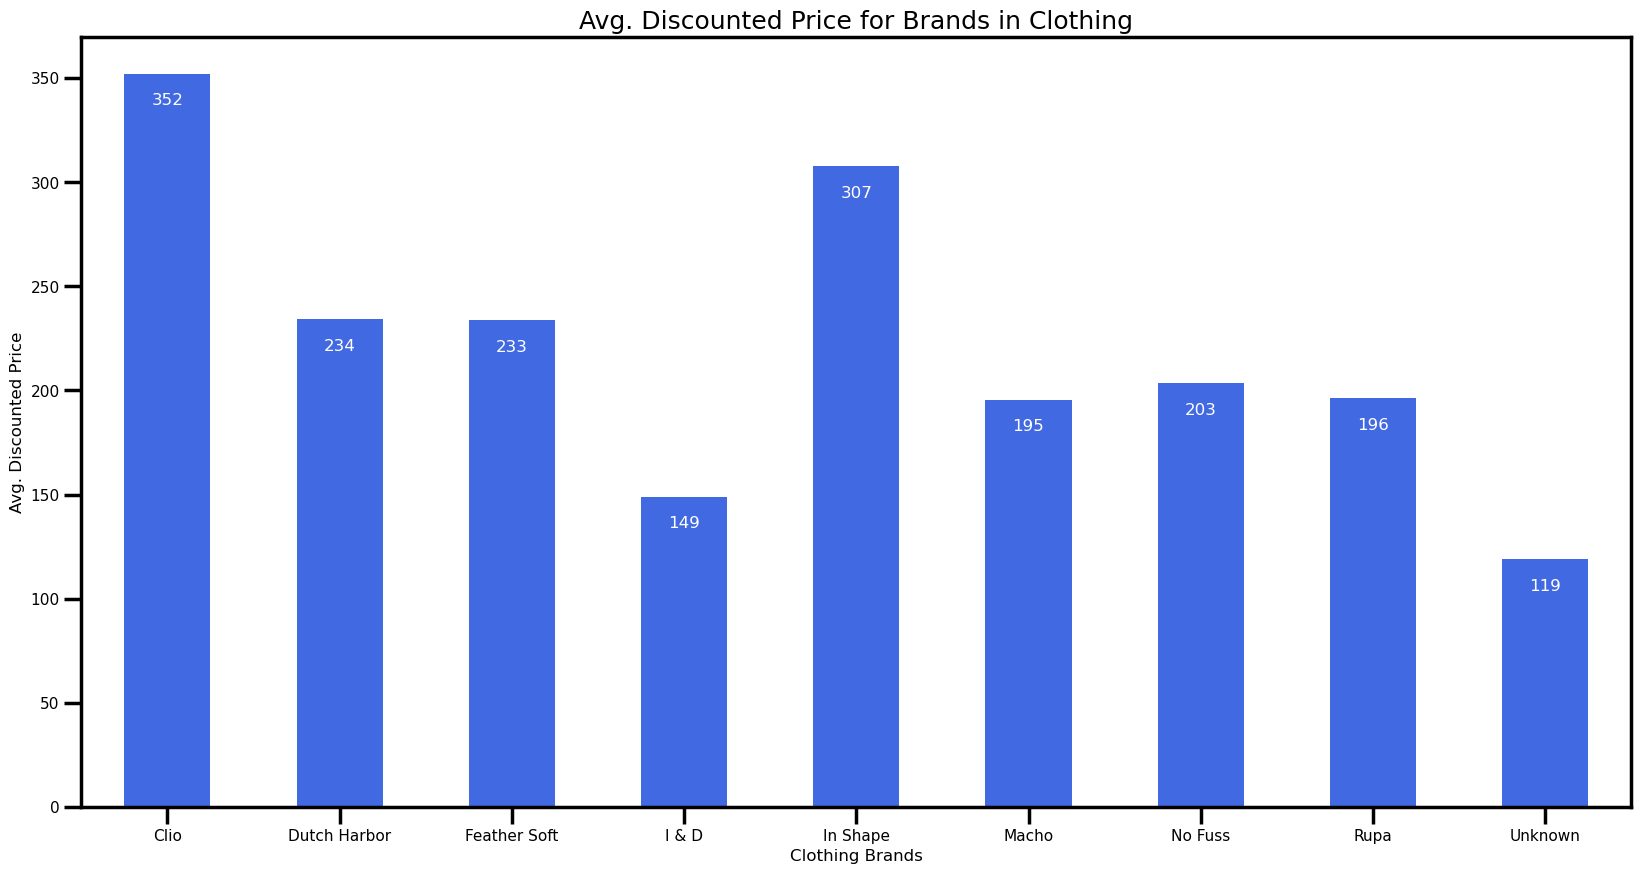

In [75]:
sns.set_context("poster", font_scale=0.5)
plt.figure(figsize=(20, 10))

ax = clothing.groupby('Brand')['DiscountedPrice'].mean().plot(
    kind='bar', color='royalblue', rot=0
)

for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", 
                (p.get_x() + 0.25, p.get_height() - 15), 
                ha='center', color='white')

plt.title('Avg. Discounted Price for Brands in Clothing', fontsize=18)
plt.xlabel('Clothing Brands')
plt.ylabel('Avg. Discounted Price')
plt.show()


In [76]:
cloth_brand_mean = clothing.groupby(['Brand','SubCategory'])['DiscountedPrice'].mean().reset_index()
cloth_brand_mean

Brand SubCategory  DiscountedPrice
0          Clio     Women's       352.125000
1  Dutch Harbor       Men's       234.200000
2  Feather Soft     Women's       233.782609
3         I & D       Men's       149.000000
4      In Shape     Women's       307.666667
5         Macho       Men's       195.562500
6       No Fuss       Men's       215.950000
7       No Fuss     Women's        79.000000
8          Rupa       Men's       196.166667
9       Unknown       Men's       119.000000

#### Women Clothing with more than 50% discount

In [77]:
clothing[(clothing['SubCategory']=="Women's")&(clothing['DiscountPercent']>50)]

Name         Brand  Price  \
4858  Feather Soft Navy Blue Ankle Length Legging - ...  Feather Soft  499.0   
4859  Feather Soft Navy Blue Ankle Length Legging - ...  Feather Soft  499.0   
4862     Feather Soft Red Ankle Length Legging - 1 Unit  Feather Soft  499.0   
4863     Feather Soft Red Ankle Length Legging - 1 Unit  Feather Soft  499.0   
4865     Feather Soft Red Ankle Length Legging - 1 Unit  Feather Soft  499.0   
4866  Feather Soft Skin Color Ankle Length Legging -...  Feather Soft  499.0   
4867  Feather Soft Skin Color Ankle Length Legging -...  Feather Soft  499.0   
4868  Feather Soft Skin Color Ankle Length Legging -...  Feather Soft  499.0   
4869  Feather Soft Skin Color Ankle Length Legging -...  Feather Soft  499.0   
4870  Feather Soft Skin Color Ankle Length Legging -...  Feather Soft  499.0   
4882    Clio Ladies T-Shirt & Pyjama Nightwear Set (B2)          Clio  599.0   
4883    Clio Ladies T-Shirt & Pyjama Nightwear Set (B3)          Clio  599.0   
4884    Clio Ladies T-Shirt & Pyjama Nightwear Set (B3)          Clio  599.0   
4885    Clio Ladies T-Shirt & Pyjama Nightwear Set (B1)          Clio  599.0   
4886    Clio Ladies T-Shirt & Pyjama Nightwear Set (B4)          Clio  599.0   

      DiscountedPrice                Category SubCategory   Quantity  \
4858            149.0  Clothing & Accessories     Women's     Size M   
4859            149.0  Clothing & Accessories     Women's     Size L   
4862            149.0  Clothing & Accessories     Women's     Size M   
4863            149.0  Clothing & Accessories     Women's     Size L   
4865            149.0  Clothing & Accessories     Women's   Size XXL   
4866            149.0  Clothing & Accessories     Women's     Size M   
4867            149.0  Clothing & Accessories     Women's     Size L   
4868            149.0  Clothing & Accessories     Women's    Size XL   
4869            149.0  Clothing & Accessories     Women's   Size XXL   
4870            149.0  Clothing & Accessories     Women's  Size XXXL   
4882            249.0  Clothing & Accessories     Women's     Size S   
4883            249.0  Clothing & Accessories     Women's     Size S   
4884            249.0  Clothing & Accessories     Women's     Size M   
4885            249.0  Clothing & Accessories     Women's     Size S   
4886            249.0  Clothing & Accessories     Women's     Size S   

                                            Description  DiscountPercent  
4858  \n- Brand Name : Feather Soft\n- Colour : Navy...               70  
4859  \n- Brand Name : Feather Soft\n- Colour : Navy...               70  
4862  \n- Brand Name : Feather Soft\n- Colour : Red\...               70  
4863  \n- Brand Name : Feather Soft\n- Colour : Red\...               70  
4865  \n- Brand Name : Feather Soft\n- Colour : Red\...               70  
4866  \n- Brand Name : Feather Soft\n- Colour : Skin...               70  
4867  \n- Brand Name : Feather Soft\n- Colour : Skin...               70  
4868  \n- Brand Name : Feather Soft\n- Colour : Skin...               70  
4869  \n- Brand Name : Feather Soft\n- Colour : Skin...               70  
4870  Unique Features :Skin friendly magical soft to...               70  
4882  Overview- Material : 100% Cotton Jersey- GSM :...               58  
4883  Overview- Material : 100% Cotton Jersey- GSM :...               58  
4884  Overview- Material : 100% Cotton Jersey- GSM :...               58  
4885  Overview- Material : 100% Cotton Jersey- GSM :...               58  
4886  Overview- Material : 100% Cotton Jersey- GSM :...               58